In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('auto-mpg.csv', header = 0)
df

# mpg => miles per gallen

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [2]:
df = df.drop(['car_name', 'origin', 'horsepower'], axis = 1, inplace = False)

In [3]:
df[:2]

,mpg,cylinders,displacement,weight,acceleration,model_year
0,18.0,8,307.0,3504,12.0,70
1,15.0,8,350.0,3693,11.5,70


In [4]:
df.shape

(398, 6)

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score 

In [6]:
y = df['mpg']
X = df.drop(['mpg'], axis = 1, inplace = False)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [7]:
X_train

,cylinders,displacement,weight,acceleration,model_year
254,6,200.0,2965,15.8,78
246,4,78.0,1985,19.4,78
282,4,140.0,2890,17.3,79
81,4,97.0,2288,17.0,72
347,4,85.0,1975,19.4,81
...,...,...,...,...,...
323,4,156.0,2800,14.4,80
192,6,250.0,3353,14.5,76
117,4,68.0,1867,19.5,73
47,6,250.0,3282,15.0,71


In [8]:
lr = LinearRegression().fit(X_train, y_train)

In [9]:
y_answer = lr.predict(X_test)

In [10]:
mse = mean_squared_error(y_test, y_answer)
rmse = np.sqrt(mse)
rmse

3.4096673954785226

In [11]:
np.round(lr.coef_, 2)

array([-0.07,  0.01, -0.01,  0.2 ,  0.75])

In [12]:
X_train[:2]

,cylinders,displacement,weight,acceleration,model_year
254,6,200.0,2965,15.8,78
246,4,78.0,1985,19.4,78


In [13]:
np.round(lr.intercept_, 2)

-17.09

In [14]:
lr.predict([[6, 100, 2000, 20, 80]])

array([33.42444788])

In [15]:
import seaborn as sns

In [16]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'weight', 'acceleration',
       'model_year'],
      dtype='object')

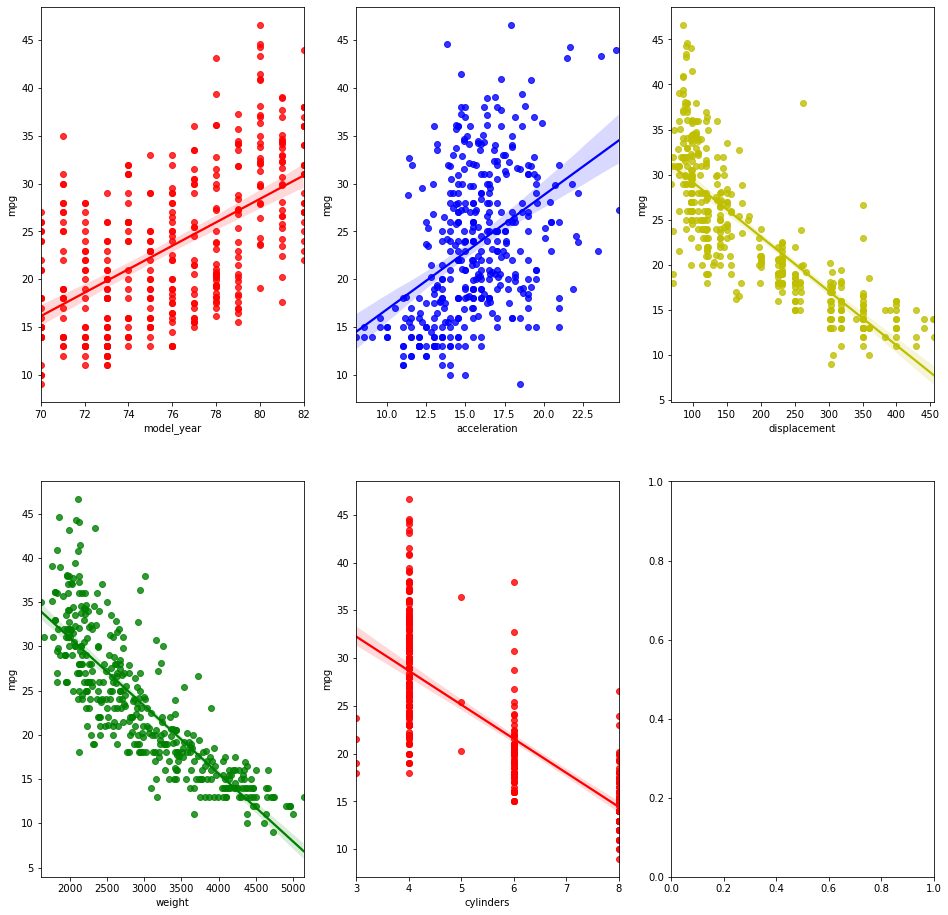

In [17]:
fig, axes = plt.subplots(figsize = (16, 16), ncols = 3, nrows = 2)
x_feature = ['model_year', 'acceleration', 'displacement', 'weight', 'cylinders']
plot_color = ['r', 'b', 'y', 'g', 'r']
for i, feature in enumerate(x_feature):
    row = int(i/3)
    col = i%3
    sns.regplot(x = feature, y = 'mpg', data=df, ax = axes[row][col], color = plot_color[i])

In [18]:
df.corr(method = 'pearson')

,mpg,cylinders,displacement,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.932824,-0.543684,-0.370164
weight,-0.831741,0.896017,0.932824,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.306564,0.288137,1.000000


In [19]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state = 1)

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)

# scaler 는 X_train기준으로 피팅된 MinMaxScaler.

MinMaxScaler()

In [21]:
X_train_s = scaler.transform(X_train)

In [22]:
print(X_train.shape, X_train_s.shape)

(426, 30) (426, 30)


In [23]:
print(X_train.min(axis = 0), X_train_s.min(axis = 0))

[6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]


In [24]:
print(X_train.max(axis = 0), X_train_s.max(axis = 0))

[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01] [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [25]:
X_test_s = scaler.transform(X_test)

In [26]:
print(X_test.min(axis = 0), X_test_s.min(axis = 0))

[7.691e+00 1.038e+01 4.834e+01 1.704e+02 6.828e-02 3.116e-02 0.000e+00
 0.000e+00 1.365e-01 4.996e-02 1.115e-01 3.871e-01 8.484e-01 7.228e+00
 2.866e-03 3.746e-03 0.000e+00 0.000e+00 7.882e-03 1.087e-03 8.678e+00
 1.420e+01 5.449e+01 2.236e+02 8.774e-02 5.131e-02 0.000e+00 0.000e+00
 1.565e-01 5.504e-02] [ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.          0.         -0.00023764 -0.00182032]


In [27]:
print(X_test.max(axis = 0), X_test_s.max(axis = 0))

[2.722e+01 3.381e+01 1.821e+02 2.250e+03 1.425e-01 3.454e-01 3.754e-01
 1.878e-01 2.906e-01 9.744e-02 1.292e+00 2.612e+00 1.012e+01 1.587e+02
 1.604e-02 1.006e-01 3.038e-01 3.322e-02 7.895e-02 1.220e-02 3.312e+01
 4.178e+01 2.208e+02 3.216e+03 2.098e-01 1.058e+00 1.252e+00 2.688e-01
 6.638e-01 2.075e-01] [0.9578778  0.81501522 0.95577362 0.89353128 0.81132075 1.21958701
 0.87956888 0.9333996  0.93232323 1.0371347  0.42669616 0.49765736
 0.44117231 0.28371044 0.48703131 0.73863671 0.76717172 0.62928585
 1.33685792 0.39057253 0.89612238 0.79317697 0.84859804 0.74488793
 0.9154725  1.13188961 1.07008547 0.92371134 1.20532319 1.63068851]


In [28]:
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=50, centers = 5, random_state = 4, cluster_std = 2)              # X, _ 에서 _의 뜻 => y를 안받겠다는 소리.(사용하지 x)

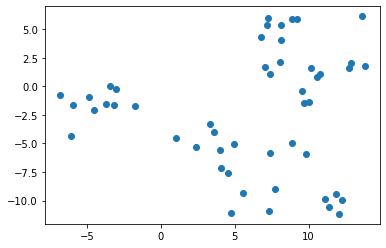

In [29]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [30]:
X_train, X_test = train_test_split(X, random_state = 5, test_size = 0.1)

In [31]:
X_train.shape

(45, 2)

Text(0.5, 1.0, 'badly Scaled data')

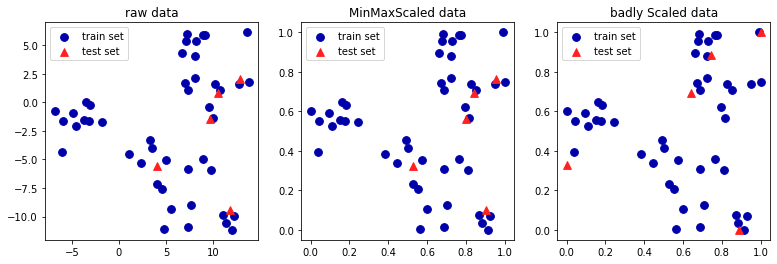

In [32]:
import mglearn
fig, axes = plt.subplots(1, 3, figsize = (13, 4))
axes[0].scatter(X_train[:, 0], X_train[:, 1], c=mglearn.cm2.colors[0], label='train set', s = 60)
axes[0].scatter(X_test[:, 0], X_test[:, 1], marker = '^', c=mglearn.cm2.colors[1], label="test set", s= 60)
axes[0].legend(loc = 'upper left')
axes[0].set_title("raw data")

scaler = MinMaxScaler().fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

axes[1].scatter(X_train_s[:, 0], X_train_s[:, 1], c=mglearn.cm2.colors[0], label='train set', s = 60)
axes[1].scatter(X_test_s[:, 0], X_test_s[:, 1], marker = '^', c=mglearn.cm2.colors[1], label="test set", s= 60)
axes[1].legend(loc = 'upper left')
axes[1].set_title("MinMaxScaled data")

test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)

axes[2].scatter(X_train_s[:, 0], X_train_s[:, 1], c=mglearn.cm2.colors[0], label='train set', s = 60)
axes[2].scatter(X_test_scaled_badly[:, 0], X_test_scaled_badly[:, 1], marker = '^', c=mglearn.cm2.colors[1], label="test set", s= 60)
axes[2].legend(loc = 'upper left')
axes[2].set_title("badly Scaled data")


In [33]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data,cancer.target, random_state = 0)
from sklearn.svm import SVC
svm = SVC(gamma = 'auto').fit(X_train, y_train)
svm.score(X_test, y_test)

0.6293706293706294

In [34]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

svm = SVC(gamma = 'auto').fit(X_train_s, y_train)
svm.score(X_test_s, y_test)

0.951048951048951

In [35]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler().fit(X_train)
X_train_s = scalar.transform(X_train)
X_test_s = scalar.transform(X_test)

svm = SVC(gamma = 'auto').fit(X_train_s, y_train)
svm.score(X_test_s, y_test)

0.965034965034965

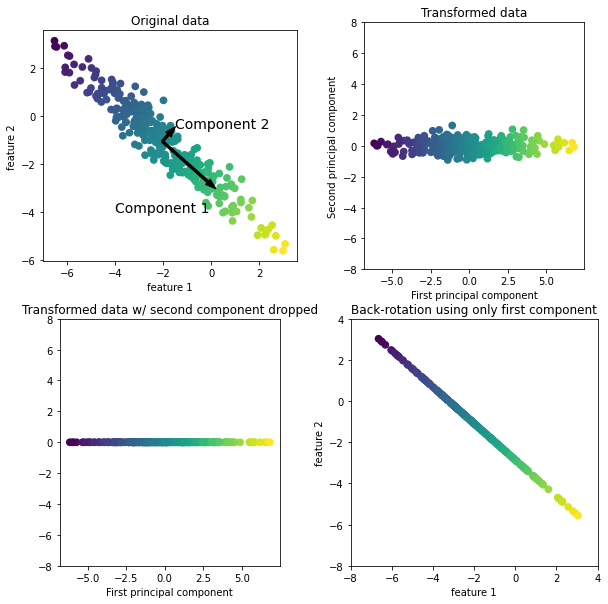

In [36]:
import mglearn
mglearn.plots.plot_pca_illustration()

In [37]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(X_train_s)
X_train_pca = pca.transform(X_train_s)

In [38]:
X_train_s.shape    # 30차원.

(426, 30)

In [39]:
X_train_pca.shape   # 2개의 차원.(30개를 2개로 융합한 관점이 생김.)

(426, 2)

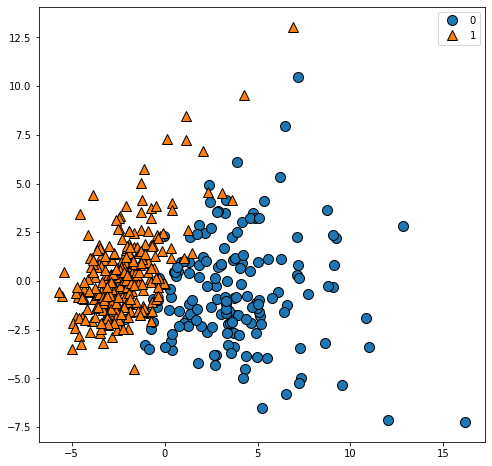

In [40]:
plt.figure(figsize = (8, 8))
mglearn.discrete_scatter(X_train_pca[:,0], X_train_pca[:, 1], y_train)
plt.legend()

Text(0, 0.5, 'Principal Components')

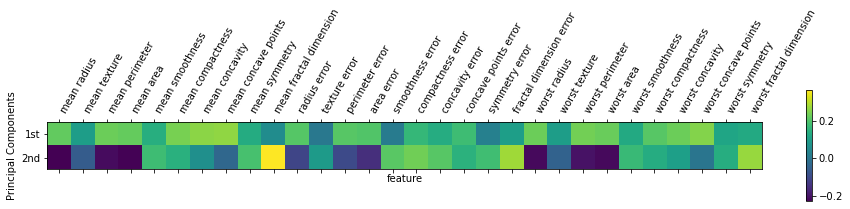

In [41]:
plt.matshow(pca.components_, cmap = 'viridis')
plt.yticks([0, 1], ['1st', '2nd'])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
          cancer.feature_names, rotation=60, ha='left')
plt.xlabel("feature")
plt.ylabel("Principal Components")

In [74]:
from sklearn.datasets import fetch_lfw_people

In [75]:
people = fetch_lfw_people(min_faces_per_person = 20, resize = 0.7)

In [76]:
image_shape = people.images[0].shape
image_shape

(87, 65)

In [77]:
people.images.shape                         # 87*65픽셀의 3023개 사진들.

(3023, 87, 65)

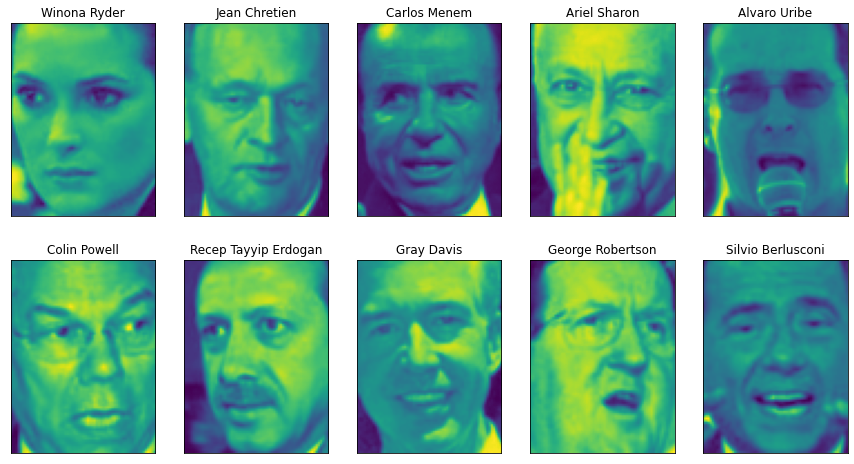

In [78]:
fig, axes = plt.subplots(2, 5, figsize = (15, 8), subplot_kw={'xticks':(), 'yticks':()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [79]:
people.target_names.shape

(62,)

In [80]:
counts = np.bincount(people.target)

In [81]:
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:25}{1:3}".format(name, count), end = '   ')                    # 틀 만들어 두고 그 안에 데이터 넣는 식으로 print 함수 구성
    if (i + 1)% 3 == 0:
        print()

Alejandro Toledo          39   Alvaro Uribe              35   Amelie Mauresmo           21   
Andre Agassi              36   Angelina Jolie            20   Ariel Sharon              77   
Arnold Schwarzenegger     42   Atal Bihari Vajpayee      24   Bill Clinton              29   
Carlos Menem              21   Colin Powell             236   David Beckham             31   
Donald Rumsfeld          121   George Robertson          22   George W Bush            530   
Gerhard Schroeder        109   Gloria Macapagal Arroyo   44   Gray Davis                26   
Guillermo Coria           30   Hamid Karzai              22   Hans Blix                 39   
Hugo Chavez               71   Igor Ivanov               20   Jack Straw                28   
Jacques Chirac            52   Jean Chretien             55   Jennifer Aniston          21   
Jennifer Capriati         42   Jennifer Lopez            21   Jeremy Greenstock         24   
Jiang Zemin               20   John Ashcroft             53 

In [82]:
# mask = np.zeros(people.target.shape, dtype = np.bool)

In [83]:
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
X_people = people.data[mask]
y_people = people.target[mask]

In [86]:
# 0~ 255 => 하나의 픽셀의 색상정보 줄 수 있는 수.
print(X_people[0].min(), X_people[0].max())
print(X_people[1].min(), X_people[1].max())
print(X_people[2].min(), X_people[2].max())

11.666667 245.0
1.3333334 241.0
4.6666665 253.33333


In [87]:
# 통계적으로 분석시 픽셀들의 색이 중요한게 아니라 개별값이 어떻게 되느냐가 중요하므로, 255로 나눔. (scaling하듯이.)
X_people = X_people/255

In [88]:
print(X_people[0].min(), X_people[0].max())
print(X_people[1].min(), X_people[1].max())
print(X_people[2].min(), X_people[2].max())

0.045751635 0.9607843
0.0052287583 0.94509804
0.018300653 0.99346405


In [89]:
from sklearn.neighbors import KNeighborsClassifier

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify = y_people, random_state = 0)

In [101]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [102]:
knn2 = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.23255813953488372

In [103]:
knn3 = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.23255813953488372

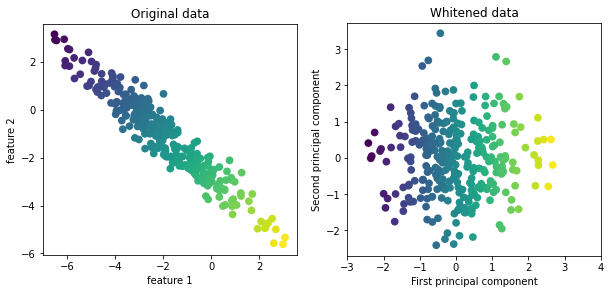

In [104]:
mglearn.plots.plot_pca_whitening()       # 스케일링 적용한 그래프로 바꾸어 주는 것.

In [105]:
pca = PCA(n_components=100, whiten = True, random_state = 0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
X_train_pca.shape

(1547, 100)

In [106]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train_pca, y_train)
knn.score(X_test_pca, y_test)

0.312015503875969

In [107]:
# 주성분 500개로 늘려 봤을 때.
pca = PCA(n_components=500, whiten = True, random_state = 0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
X_train_pca.shape


knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train_pca, y_train)
knn.score(X_test_pca, y_test)

0.14147286821705427

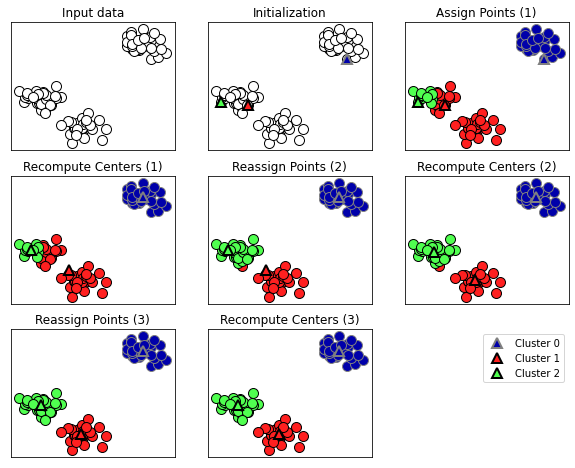

In [108]:
mglearn.plots.plot_kmeans_algorithm()